# Linear regression

files needed = ('sleep75.dta', 'wage1.dta')

This notebook introduces us to the statsmodels package [(docs)](https://devdocs.io/statsmodels/), which provides functions for formulating and estimating statistical models. Econometrics is a prerequisite for this course, so this notebook will not address the models, per se, but will focus on how to take what you learned in econometrics class and use it in python. 

Most of you used STATA in your econometrics course. STATA is a great package for econometrics. Python can do most of what STATA can do, but STATA will have more specialized routines available. As python's popularity is grows the kinds of models you can estimated in grows, too.    

If STATA is your thing, this [page](http://rlhick.people.wm.edu/posts/comparing-stata-and-ipython-commands-for-ols-models.html) on Rob Hicks' website is a nice STATA to python concordance.  

In [1]:
import pandas as pd                    # for data handling
import numpy as np                     # for numerical methods and data structures
import matplotlib.pyplot as plt        # for plotting
import seaborn as sea                  # advanced plotting

import patsy                           # provides a syntax for specifying models  
import statsmodels.api as sm           # provides statistical models like ols, gmm, anova, etc...
import statsmodels.formula.api as smf  # provides a way to directly spec models from formulas

### Reading Stata data files

Most of you used Wooldridge's textbook in econometrics. I figure you would like to relive those happy times, so we can work through some of the problems in the Wooldridge textbook. 

On the plus side, the data that correspond to the Wooldridge problems are available to download and they are **ALREADY CLEANED.** \[I contemplated adding some junk to the files to make it more interesting...\]

On the minus side, the files are in STATA's .dta format. 

Lucky for use, pandas has a method that [reads stata files](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_stata.html). It also has methods for SQL, SAS,json,...

In [2]:
# Use pandas read_stata method to get the stata formatted data file into a DataFrame.
sleep = pd.read_stata('sleep75.dta')

# Take a look...so clean!
sleep.head()

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32.0,0.0,1.0,0.0,0.0,12.0,0.0,0.0,1.0,3529.0,...,0.0,3438.0,0.0,3438.0,0.0,14.0,0.0,13.0,7.070004,1024.0
1,31.0,0.0,2.0,0.0,0.0,14.0,9500.0,1.0,1.0,2140.0,...,0.0,5020.0,0.0,5020.0,0.0,11.0,0.0,0.0,1.429999,961.0
2,44.0,0.0,3.0,0.0,0.0,17.0,42500.0,1.0,1.0,4595.0,...,1.0,2815.0,0.0,2815.0,0.0,21.0,0.0,0.0,20.530001,1936.0
3,30.0,0.0,4.0,0.0,0.0,12.0,42500.0,1.0,1.0,3211.0,...,1.0,3786.0,0.0,3786.0,0.0,12.0,0.0,12.0,9.619998,900.0
4,64.0,0.0,5.0,0.0,0.0,14.0,2500.0,1.0,1.0,4052.0,...,1.0,2580.0,0.0,2580.0,0.0,44.0,0.0,33.0,2.750000,4096.0


In [3]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 706 entries, 0 to 705
Data columns (total 34 columns):
age         706 non-null float32
black       706 non-null float32
case        706 non-null float32
clerical    706 non-null float32
construc    706 non-null float32
educ        706 non-null float32
earns74     706 non-null float32
gdhlth      706 non-null float32
inlf        706 non-null float32
leis1       706 non-null float32
leis2       706 non-null float32
leis3       706 non-null float32
smsa        706 non-null float32
lhrwage     532 non-null float32
lothinc     706 non-null float32
male        706 non-null float32
marr        706 non-null float32
prot        706 non-null float32
rlxall      706 non-null float32
selfe       706 non-null float32
sleep       706 non-null float32
slpnaps     706 non-null float32
south       706 non-null float32
spsepay     706 non-null float32
spwrk75     706 non-null float32
totwrk      706 non-null float32
union       706 non-null float32
work

### Describing models with patsy
The patsy package provides us with a formulaic syntax for defining models that uses strings. The basic syntax is 
```
y ~ x1 + x2
```
which describes the model 

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \epsilon$.

Notice that I did not specify the constant. Patsy takes care of that automatically. Let's start slow and build up the regression, then we will see how to do it all in one shot. 

We start by passing our model, specified in a patsy string to `patsy.dmatrices( )` to create the *design matrices*. Our model is 

$$ sleep = \beta_0 + \beta_1 totwrk + \beta_2 educ + \beta_3 age + \epsilon $$.

\[This is in problem 3, chapter 3 or Wooldrigde.\]

In [4]:
# Pass the model formula and the associated data to create design matrices
y, X = patsy.dmatrices('sleep ~ totwrk + educ + age', sleep)

In [5]:
# What do we have?
print('X and y are of type:' , type(X), type(y))

X and y are of type: <class 'patsy.design_info.DesignMatrix'> <class 'patsy.design_info.DesignMatrix'>


In [6]:
# Peak at X and y
X

DesignMatrix with shape (706, 4)
  Intercept  totwrk  educ  age
          1    3438    12   32
          1    5020    14   31
          1    2815    17   44
          1    3786    12   30
          1    2580    14   64
          1    1205    12   41
          1    2113    12   35
          1    3608    13   47
          1    2353    17   32
          1    2851    15   30
          1    6415     8   43
          1     370    16   23
          1    2438    16   24
          1    2693     5   48
          1    2526    12   33
          1    2950    12   23
          1    3003    17   46
          1    4011    14   37
          1    2300    12   53
          1    1543    17   45
          1    3473    17   46
          1    3276    13   40
          1    2506    12   53
          1    2651    13   29
          1    4580    12   29
          1    3588    12   53
          1    3418    13   28
          1    2250    12   35
          1    2638    12   36
          1    3173    12   59
  [676

In [7]:
y

DesignMatrix with shape (706, 1)
  sleep
   3113
   2920
   2670
   3083
   3448
   4063
   3180
   2928
   3368
   3018
   1575
   3295
   3798
   3008
   3248
   3683
   3201
   2580
   3420
   3090
   2760
   2880
   3470
   2673
   2820
   2873
   1905
   2926
   2603
   3238
  [676 rows omitted]
  Terms:
    'sleep' (column 0)
  (to view full data, use np.asarray(this_obj))

So `X` holds the independent variables and `y` holds the dependent variable. Note the addition of the intercept (the column of ones) to the `X` matrix. 

### Building and estimating the model in statsmodels

With the design matrices in hand, we can build **ordinary least squares** model in statsmodels. 

In [8]:
# Pass design matrices to OLS to spec an ordinary least squares model
sleep_model = sm.OLS(y, X)
type(sleep_model)

statsmodels.regression.linear_model.OLS

We can now estimate (fit) the model using the `.fit( )` method of the statsmodel object.

In [9]:
res = sleep_model.fit()  # Estimate the model and store the results in res
type(res)          # What do we have here?


statsmodels.regression.linear_model.RegressionResultsWrapper

In [10]:
# To see the summary report
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  sleep   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     29.92
Date:                Wed, 12 Dec 2018   Prob (F-statistic):           3.28e-18
Time:                        09:47:30   Log-Likelihood:                -5263.1
No. Observations:                 706   AIC:                         1.053e+04
Df Residuals:                     702   BIC:                         1.055e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3638.2453    112.275     32.405      0.0

The more you work, the less you sleep. I feel better already.

We can retrieve individual results from the RegressionResultsWrapper object. Try res.`TAB` to see what's in there. 

In [11]:
print('The parameters are:', res.params, '\n')
print('The confidence intervals are:', res.conf_int(), '\n')
print('The r-sqared is:', res.rsquared)

The parameters are: [ 3.63824531e+03 -1.48373438e-01 -1.11338131e+01  2.19988481e+00] 

The confidence intervals are: [[ 3.41781008e+03  3.85868055e+03]
 [-1.81148684e-01 -1.15598192e-01]
 [-2.26872877e+01  4.19661463e-01]
 [-6.38561308e-01  5.03833093e+00]] 

The r-sqared is: 0.11336395596679805


### Directly specifying and estimating models with the formula.api

We have built our model from the ground up
1. Create the design matrices with patsy
2. Create the model with statsmodel
3. Fit the model and obtain results

That was helpful to get a sense of what is going on, but we can do all those steps in one line of code. We just pass the patsy string and the data directly to statsmodels and call fit.

To do this, we use the `statsmodels.formula.api` methods, which we imported as `smf`. The formula api interprets the patsy formula for us, and creates the design matrices. 

In [12]:
res = smf.ols('sleep ~ totwrk + educ + age', data=sleep).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  sleep   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     29.92
Date:                Wed, 12 Dec 2018   Prob (F-statistic):           3.28e-18
Time:                        09:47:30   Log-Likelihood:                -5263.1
No. Observations:                 706   AIC:                         1.053e+04
Df Residuals:                     702   BIC:                         1.055e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3638.2453    112.275     32.405      0.0

### Data transformations
Patsy can handle common (and less common) regression tasks. Here are a few

#### Interacting variables
Use '\*' to interact two variables. Patsy will also include the two variables individually, too. Below, we interact education an age

$$ sleep = \beta_0 + \beta_1 totwrk + \beta_2 educ + \beta_3 age + \beta_4 age\times educ + \epsilon $$.

In [13]:
res = smf.ols('sleep ~ totwrk + educ*age', data=sleep).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  sleep   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     23.67
Date:                Wed, 12 Dec 2018   Prob (F-statistic):           2.24e-18
Time:                        09:47:30   Log-Likelihood:                -5260.9
No. Observations:                 706   AIC:                         1.053e+04
Df Residuals:                     701   BIC:                         1.055e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3081.4242    286.426     10.758      0.0

#### logs 

We use the `np.log( )` method directly in the patsy syntax. Note that we loaded the numpy package above as np. Below, we use the logarithm of age in the model

$$ sleep = \beta_0 + \beta_1 totwrk + \beta_2 educ + \beta_3 \log(age)  + \epsilon $$.

In [14]:
res = smf.ols('sleep ~ totwrk + educ + np.log(age)', data=sleep).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  sleep   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     29.79
Date:                Wed, 12 Dec 2018   Prob (F-statistic):           3.91e-18
Time:                        09:47:30   Log-Likelihood:                -5263.3
No. Observations:                 706   AIC:                         1.053e+04
Df Residuals:                     702   BIC:                         1.055e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3440.9308    239.448     14.370      

#### Fixed effects
When I was a kid, we called these dummy variables. Gender is coded {0,1} in the variable male. 

In [15]:
sleep['male'].head()

0    1.0
1    1.0
2    1.0
3    0.0
4    1.0
Name: male, dtype: float32

In [16]:
res = smf.ols('sleep ~ totwrk + educ + age + C(male)', data=sleep).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  sleep   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     24.26
Date:                Wed, 12 Dec 2018   Prob (F-statistic):           8.02e-19
Time:                        09:47:30   Log-Likelihood:                -5259.8
No. Observations:                 706   AIC:                         1.053e+04
Df Residuals:                     701   BIC:                         1.055e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3642.4666    111.844     32.

The 'T.1.0' notation is a bit confusing in this context. It means it is giving the value for the '1.0' variable. Since we have included a constant, one of the categories gets dropped. 

To see things more clearly, let's recode the male variable. 

In [17]:
sleep['gender'] = sleep['male'].replace({1.0:'male', 0.0:'female'})

res = smf.ols('sleep ~ totwrk + educ + age + C(gender)', data=sleep).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  sleep   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     24.26
Date:                Wed, 12 Dec 2018   Prob (F-statistic):           8.02e-19
Time:                        09:47:30   Log-Likelihood:                -5259.8
No. Observations:                 706   AIC:                         1.053e+04
Df Residuals:                     701   BIC:                         1.055e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          3642.4666    111.84

#### No intercept 
Use `-1` to kill the automatic intercept. Try is with our gender data to explicitly recover the female fixed effect. Now you have to do the subtraction yourself to see that males sleep, on average, 87.9933 more hours.

In [18]:
res = smf.ols('sleep ~ totwrk + educ + age + C(gender) -1', data=sleep).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  sleep   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     24.26
Date:                Wed, 12 Dec 2018   Prob (F-statistic):           8.02e-19
Time:                        09:47:30   Log-Likelihood:                -5259.8
No. Observations:                 706   AIC:                         1.053e+04
Df Residuals:                     701   BIC:                         1.055e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
C(gender)[female]  3642.4666    111.84

## Practice

Take a few minutes and try the following. Feel free to chat with those around you if you get stuck. The TA and I are here, too. 

Wooldridge problem C2 in chapter 6. 

1. Load wage1.dta
2. Scatter plot log(wage) against educ

In [19]:
wage1 = pd.read_stata('wage1.dta')

# There is already a log(wage) variable in the data set (lwage) but we can always use some practice with transforms
wage1['lnwage'] = wage1['wage'].apply(np.log)

wage1.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq,lnwage
0,3.10,11.0,2.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.131402,4.0,0.0,1.131402
1,3.24,12.0,22.0,2.0,0.0,1.0,1.0,3.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.175573,484.0,4.0,1.175573
2,3.00,11.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.098612,4.0,0.0,1.098612
3,6.00,8.0,44.0,28.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.791759,1936.0,784.0,1.791759
4,5.30,12.0,7.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.667707,49.0,4.0,1.667707


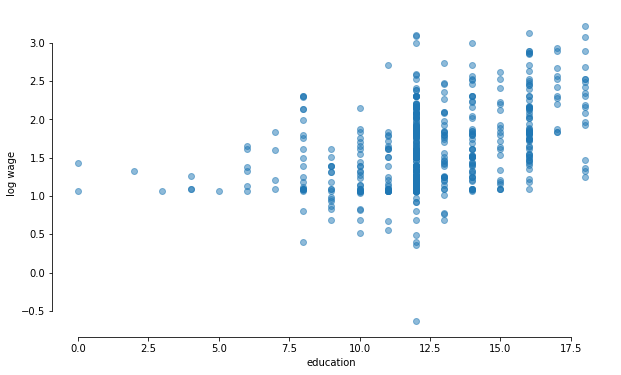

In [20]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(wage1['educ'], wage1['lnwage'], marker='o', alpha = 0.5 )

ax.set_xlabel('education')
ax.set_ylabel('log wage')

sea.despine(ax=ax, trim=True)

3. Estimate 
$$ \log(wage) = \beta_0 + \beta_1 educ + \epsilon$$

In [21]:
res = smf.ols('np.log(wage) ~ educ', data=wage1).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     119.6
Date:                Wed, 12 Dec 2018   Prob (F-statistic):           3.27e-25
Time:                        09:47:31   Log-Likelihood:                -359.38
No. Observations:                 526   AIC:                             722.8
Df Residuals:                     524   BIC:                             731.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5838      0.097      5.998      0.0

4. Scatter plot the residuals against education. The residuals are in the results object from the fit method. 

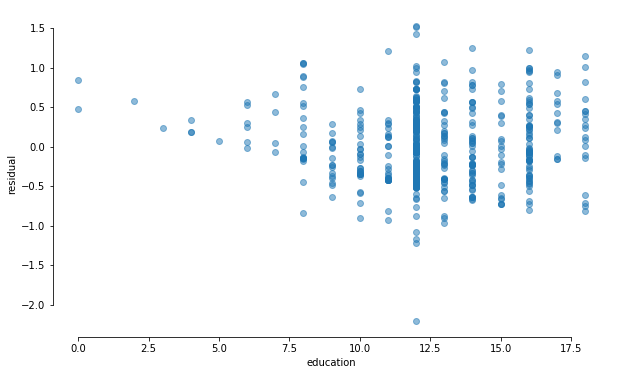

In [22]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(wage1['educ'], res.resid, marker='o', alpha = 0.5 )

ax.set_xlabel('education')
ax.set_ylabel('residual')

sea.despine(ax=ax, trim=True)

5. Looks heteroskedastic. We can change the covariance matrix type (which will correct the standard error calculation) using the `cov_type` parameter [(docs)](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.fit.html#statsmodels.regression.linear_model.OLS.fit). The types of covariance matrices are described in the [docs](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html).

Try 'HC3' for your covariance matrix type.

In [23]:
res = smf.ols('np.log(wage) ~ educ', data=wage1).fit(cov_type='HC3')
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     111.7
Date:                Wed, 12 Dec 2018   Prob (F-statistic):           8.48e-24
Time:                        09:47:31   Log-Likelihood:                -359.38
No. Observations:                 526   AIC:                             722.8
Df Residuals:                     524   BIC:                             731.3
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5838      0.099      5.872      0.0

6. Scatter plot the data and add the regression line.


To plot the regression line you will need to create some x data and then apply the parameters. I used something like this
```python
y = [p.Intercept + p.educ*i for i in x]
```
where `p` hold the parameters from my results and x holds a few x data points. 

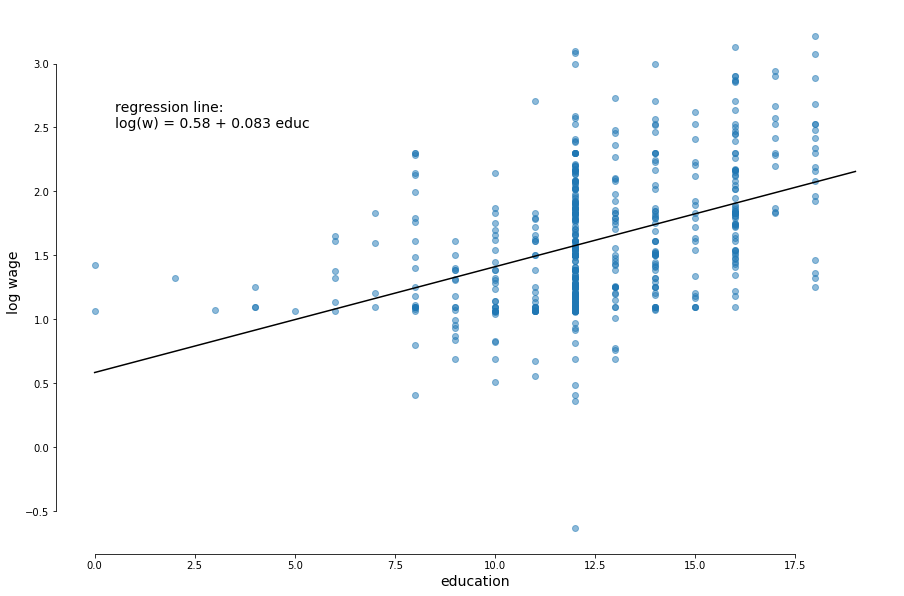

In [24]:
fig, ax = plt.subplots(figsize=(15,10))

# Plot the data
ax.scatter(wage1['educ'], wage1['lnwage'], marker='o', alpha = 0.5 )

# Create the line of best fit to plot
p = res.params                                # params from the model fit
x = range(0,20)                               # some x data
y = [p.Intercept + p.educ*i for i in x]       # apply the coefficients 

ax.plot(x,y, color='black')

# build the string
text = 'regression line: \nlog(w) = {0:.2} + {1:.2} educ'.format(p.Intercept, p.educ)

ax.text(0.5, 2.5, text, fontsize=14)

ax.set_xlabel('education', fontsize=14)
ax.set_ylabel('log wage', fontsize=14)

sea.despine(ax=ax, trim=True)

7. Go back and add the text 'log(w) = a + b*educ' to the northwest corner of your plot. Replace a and b with the estimated parameter values. 

8. Let's add some more regressors. Estimate
$$ \log(wage) = \beta_0 + \beta_1 educ + \beta_2 exper + \beta_3 exper^2 + \beta_4I_m + \epsilon$$

where $I_m$ is a variable equal to 1 if the worker is a married.

In [25]:
res = smf.ols('np.log(wage) ~ educ + exper + np.power(exper,2) + C(married)', data=wage1).fit(cov_type='HC3')
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     54.50
Date:                Wed, 12 Dec 2018   Prob (F-statistic):           2.22e-38
Time:                        09:47:32   Log-Likelihood:                -315.96
No. Observations:                 526   AIC:                             641.9
Df Residuals:                     521   BIC:                             663.3
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.1427      0